In [15]:
import os
import math

import h5py
import numpy as np
import matplotlib.pyplot as plt

## Inputs

In [11]:
cell = 20
cell_no = cell - 1
maxtime = None
mintime = None

## Load C++ results

In [12]:
results = h5py.File('_duct_results.h5', 'r')

x = np.asarray(results['_duct/x'])
print("x shape", x.shape)

# cell position
cellpos = np.asarray(results['_duct/CellPos'])
print("CellPos shape", cellpos.shape)

# sorting cell positions
sortedidx = np.argsort(cellpos)
cellpos = np.sort(cellpos)
sortedidx = np.flip(sortedidx)
cellpos = np.flip(cellpos)

# lumen segment positions
intpos = np.asarray(results['_duct/IntPos'])
print("IntPos shape", intpos.shape)

# attributes for x array
for key in results['_duct'].attrs.keys():
    print(f"{key}: {results['_duct'].attrs[key]}")
v_c = results['_duct'].attrs['number of cellular variables']
v_l = results['_duct'].attrs['number of lumenal variables']
n_c = results['_duct'].attrs['number of cells']
n_l = results['_duct'].attrs['number of lumen discs']

# which discs this cell interfaces with
disc_mask = np.asarray(results['_duct/CellDiscMask'])
cell_disc_mask = disc_mask[cell_no][:]
disc_index = np.where(cell_disc_mask == 1)[0][0]  # just take the first disc this cell interacts with
print("disc index", disc_index)

# time values
dt = results.attrs["output time interval"]
print("output time interval: %f s" % dt)
timevals = np.arange(0.0, x.shape[0]*dt-0.5*dt, dt)
assert timevals.shape[0] == x.shape[0]

# cells and discs
xc_cxx = x[:, :n_c * v_c].reshape(len(timevals), n_c, v_c)
xl_cxx = x[:, n_c * v_c:].reshape(len(timevals), n_l, v_l)
print("xc.shape", xc_cxx.shape)
print("xl.shape", xl_cxx.shape)

yy_c_cxx = xc_cxx[:, cell_no, :]
yy_l_cxx = xl_cxx[:, disc_index, :]

x shape (1001, 570)
CellPos shape (34,)
IntPos shape (44,)
number of cells: 34
number of cellular variables: 9
number of lumen discs: 44
number of lumenal variables: 6
disc index 10
output time interval: 1.000000 s
xc.shape (1001, 34, 9)
xl.shape (1001, 44, 6)


## Load Matlab results

In [13]:
results_mat = h5py.File('matlab_results.h5', 'r')

x_mat = np.asarray(results_mat['/x'])
print("x_mat shape", x_mat.shape)

# time values
timevals_mat = np.asarray(results_mat['/t'])[:,0]

# cells and discs
xc_mat = x_mat[:, :n_c * v_c].reshape(len(timevals_mat), n_c, v_c)
xl_mat = x_mat[:, n_c * v_c:].reshape(len(timevals_mat), n_l, v_l)
print("xc.shape", xc_mat.shape)
print("xl.shape", xl_mat.shape)

yy_c_mat = xc_mat[:, cell_no, :]
yy_l_mat = xl_mat[:, disc_index, :]

x_mat shape (2001, 570)
xc.shape (2001, 34, 9)
xl.shape (2001, 44, 6)


## Plotting

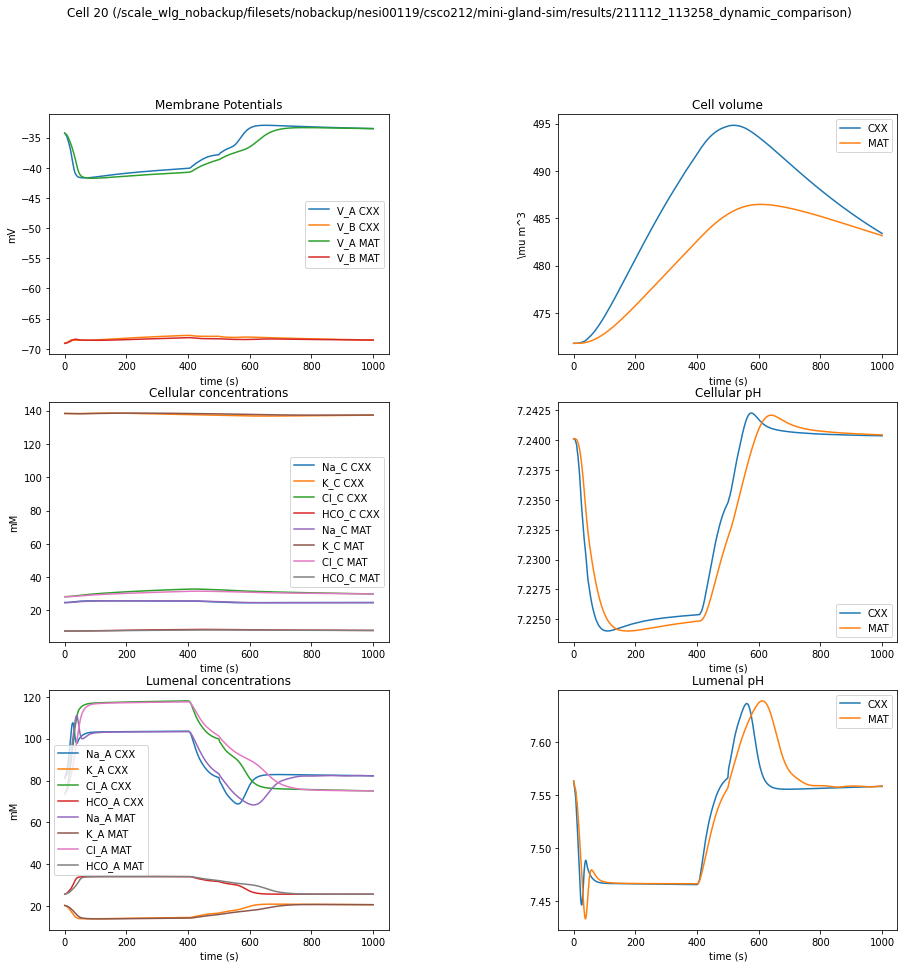

In [20]:
nrow = 3
ncol = 2
fig, plots = plt.subplots(nrow, ncol, squeeze=False)
plt.subplots_adjust(wspace=0.5)
fig.set_size_inches(ncol * 7.6, nrow * 5.0)
fig.suptitle(f"Cell {cell} ({os.getcwd()})")

plots[0, 0].plot(timevals, yy_c_cxx[:, 0], label="V_A CXX")
plots[0, 0].plot(timevals, yy_c_cxx[:, 1], label="V_B CXX")
plots[0, 0].plot(timevals_mat, yy_c_mat[:, 0], label="V_A MAT")
plots[0, 0].plot(timevals_mat, yy_c_mat[:, 1], label="V_B MAT")
plots[0, 0].legend(loc='best')
plots[0, 0].set_title("Membrane Potentials")
plots[0, 0].set_xlabel("time (s)")
plots[0, 0].set_ylabel("mV")
plots[0, 0].ticklabel_format(useOffset=False)

plots[0, 1].plot(timevals, yy_c_cxx[:, 2], label="CXX")
plots[0, 1].plot(timevals_mat, yy_c_mat[:, 2], label="MAT")
plots[0, 1].legend(loc='best')
plots[0, 1].set_title("Cell volume")
plots[0, 1].set_xlabel("time (s)")
plots[0, 1].set_ylabel("\\mu m^3")
plots[0, 1].ticklabel_format(useOffset=False)

plots[1, 0].plot(timevals, yy_c_cxx[:, 3], label="Na_C CXX")
plots[1, 0].plot(timevals, yy_c_cxx[:, 4], label="K_C CXX")
plots[1, 0].plot(timevals, yy_c_cxx[:, 5], label="Cl_C CXX")
plots[1, 0].plot(timevals, yy_c_cxx[:, 6], label="HCO_C CXX")
plots[1, 0].plot(timevals_mat, yy_c_mat[:, 3], label="Na_C MAT")
plots[1, 0].plot(timevals_mat, yy_c_mat[:, 4], label="K_C MAT")
plots[1, 0].plot(timevals_mat, yy_c_mat[:, 5], label="Cl_C MAT")
plots[1, 0].plot(timevals_mat, yy_c_mat[:, 6], label="HCO_C MAT")
plots[1, 0].legend(loc='best')
plots[1, 0].set_title("Cellular concentrations")
plots[1, 0].set_xlabel("time (s)")
plots[1, 0].set_ylabel("mM")
plots[1, 0].ticklabel_format(useOffset=False)

plots[1, 1].plot(timevals, -np.log10(yy_c_cxx[:, 7] * 1e-3), label="CXX")
plots[1, 1].plot(timevals_mat, -np.log10(yy_c_mat[:, 7] * 1e-3), label="MAT")
plots[1, 1].legend(loc='best')
plots[1, 1].set_title("Cellular pH")
plots[1, 1].set_xlabel("time (s)")
plots[1, 1].ticklabel_format(useOffset=False)

plots[2, 0].plot(timevals, yy_l_cxx[:, 0], label="Na_A CXX")
plots[2, 0].plot(timevals, yy_l_cxx[:, 1], label="K_A CXX")
plots[2, 0].plot(timevals, yy_l_cxx[:, 2], label="Cl_A CXX")
plots[2, 0].plot(timevals, yy_l_cxx[:, 3], label="HCO_A CXX")
plots[2, 0].plot(timevals_mat, yy_l_mat[:, 0], label="Na_A MAT")
plots[2, 0].plot(timevals_mat, yy_l_mat[:, 1], label="K_A MAT")
plots[2, 0].plot(timevals_mat, yy_l_mat[:, 2], label="Cl_A MAT")
plots[2, 0].plot(timevals_mat, yy_l_mat[:, 3], label="HCO_A MAT")
plots[2, 0].legend(loc='best')
plots[2, 0].set_title("Lumenal concentrations")
plots[2, 0].set_xlabel("time (s)")
plots[2, 0].set_ylabel("mM")
plots[2, 0].ticklabel_format(useOffset=False)

plots[2, 1].plot(timevals, -np.log10(yy_l_cxx[:, 4] * 1e-3), label="CXX")
plots[2, 1].plot(timevals_mat, -np.log10(yy_l_mat[:, 4] * 1e-3), label="MAT")
plots[2, 1].legend(loc='best')
plots[2, 1].set_title("Lumenal pH")
plots[2, 1].set_xlabel("time (s)")
plots[2, 1].ticklabel_format(useOffset=False)

In [21]:
fig.savefig('plot_time_compare.pdf')